<a href="https://colab.research.google.com/github/subhamsinha732/Play-Store-App-Review-Analysis-and-User-Reviews/blob/main/Subham_Sinha_Play_Store_App_Review_Analysis_Capstone_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Analysis done on dataset

### 1. Find out the app category which application has been installed maximum no. of times.

### 2. What are the factors affecting the maximum downloads?

### 3. Exploring the top 5 highest rated free and paid apps.

### 4. Exploring the avg rating for each category.

### 5. Understanding the sentiment polarity of the users.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# <u>  Read the Data:</u>
There are two datasets.


*   Play Store data
*   User Review




In [ ]:
df_PlayStore = pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")
df_UserReview = pd.read_csv("/content/drive/MyDrive/User Reviews.csv")

In [ ]:
df_PlayStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## TEEN:
Titles rated T (Teen) have content that may be suitable for ages 13 and older

# Sentiment_subjectivity:
 means that if value is high positive means it has a personal opinion rather than factual information.

 # polarity:
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

# subjectivity
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].
Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information

# App Size
The amount of space required to install your app. It measures in Metric or Imperial.

# polarity:
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

# subjectivity
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].
Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information

# App Size
The amount of space required to install your app. It measures in Metric or Imperial.

#<u> 1. Find out the app category which application has been installed maximum no. of times.<u>

In [ ]:
df_PlayStore.shape

(10841, 13)

In [ ]:
df_PlayStore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df_PlayStore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
df_PlayStore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

As we can see that in Category column, there is "1.9" which is not appropariate and same we can see in Installs. In Installation we must have numeric values but we can see here 'Free' so this records we need to delete as well.

In [ ]:
df_PlayStore[df_PlayStore['Installs']=='Free'] # bool indexing

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
row_to_drop = list(df_PlayStore[df_PlayStore['Category']=='1.9'].index)

In [ ]:
# As we can see the 10472 index records in not appropriate then just drop this record
df_PlayStore = df_PlayStore.drop(index = row_to_drop,axis = 0 )

In [ ]:
df_PlayStore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df_PlayStore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
df_PlayStore.info() # Installs is object type we need to convert it into int and also we need to remove the + sign at the last of each no. of installation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [ ]:
def formatting_(x):
  """
  This function would take the each element of installs col. and replace "," with " " and change the type of that as well.
  Function_Name : formatting_
  Return : integer type single element at a time
  argument : Take a string

  """
  if x == '0':
    return int(x)  
  x = x[:-1]
  x = x.replace(',','')
  return int(x)

In [ ]:
df_PlayStore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df_PlayStore['Installs'] = df_PlayStore['Installs'].apply(lambda x : formatting_(x))

In [ ]:
df_PlayStore.groupby(['Category']).agg({'Installs':'sum'}).sort_values(by = 'Installs',ascending = False).head(5)

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915


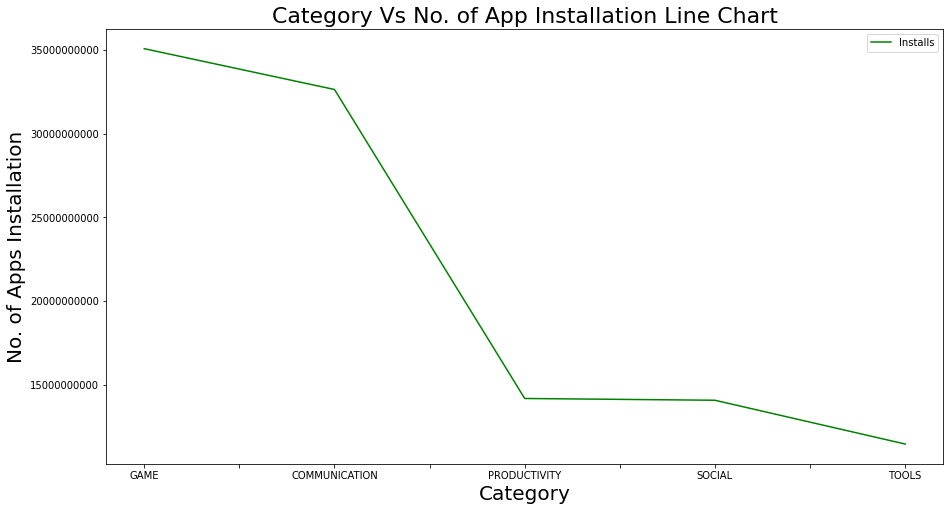

In [ ]:
ax = df_PlayStore.groupby(['Category']).agg({'Installs':'sum'}).sort_values(by = 'Installs', ascending = False).head().plot(kind = 'line', figsize = (15,8), color = 'green');
ax.set_xlabel("Category", fontsize = 20)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.set_ylabel("No. of Apps Installation", fontsize = 20)
ax.set_title("Category Vs No. of App Installation Line Chart", fontsize = 22);
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [ ]:
df_PlayStore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df_ = df_PlayStore.groupby(['Category']).agg({'Installs':'sum'}).sort_values(by = 'Installs', ascending = False).reset_index()
df_ = df_.head(10)
a = df_['Installs']
labels  = df_['Category']
# df_.plot.pie(y = 'Installs', figsize = (16,9),fontsize=22, autopct='%1.0f%%')
# plt.legend(['a','b','c','d','e','f','g','h','i','j'])
# plt.axis('equal')



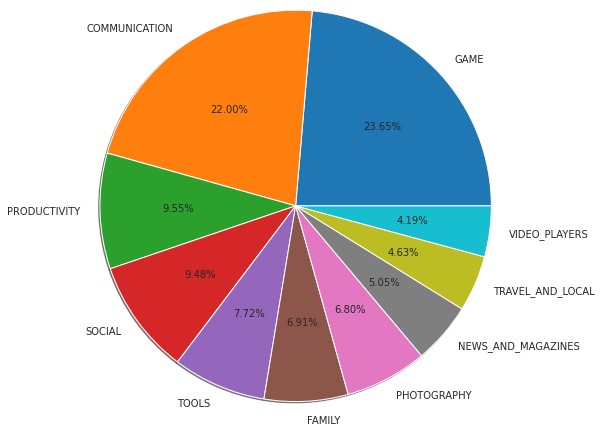

In [ ]:
plt.figure(figsize = (5,3))
plt.pie(a,autopct='%1.2f%%',shadow=True, radius=3,labels = labels);


# <u>  INFERENCE:</u>
1. "GAME" category Apps have been installed maximum no. of times.
 and we can see in above Bar graph as well.
2. We have formatted the Installs col where you can see the no. of Installs are given in the form of 2000+ ,453+,450000+ like this. We have converted that into 2000, 453, 450000 only so that later on we can apply some arithmetic and other operations

In [ ]:
df_PlayStore['App'].value_counts().nlargest(10)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Name: App, dtype: int64

In [ ]:
df_PlayStore.shape

(10840, 13)

In [ ]:
df_PlayStore.drop_duplicates(inplace=True)

In [ ]:
type(df_PlayStore)

pandas.core.frame.DataFrame

In [ ]:
df_PlayStore.shape

(10357, 13)

In [ ]:
df_PlayStore[df_PlayStore['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


# <u> INFERENCE:</u>
As we can see that single app is repeating multiple times, so we need to take only single app. We would not want to take multiple app records because there is no need to take all since these apps are not duplicate values. So on the basis of some criteria, we need to take only single records of app and we will take an app which has more frequently repeating category and maximum reviews.


In [ ]:
dn = df_PlayStore[df_PlayStore['App'] == 'ROBLOX']

In [ ]:
dn

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
def handling_app_col(df):
  """
  Description : This function would take a dataframe/Series Related to an App. Which would contains duplicates Apps. Ur object is to take only single 
  app Record.
  Arguments : DataFrame/Series
  Return : Series/DataFrame
  Author : Data Huntsmen
  """
  cat_ = df['Category']
  count_list = []
  list_cat = list(cat_)
  unique_list = cat_.unique()
  for cat in unique_list:
    count_list.append(list_cat.count(cat))
  a = max(count_list)
  indx = count_list.index(a)
  cat_name = unique_list[indx]  
  df1 = df[df['Category'] == unique_list[0]]
  max_reviews = df1['Reviews'].max()
  return df1[df1['Reviews'] == max_reviews]

In [ ]:
def create_df_app(app_name):
  d_ = df_PlayStore[df_PlayStore['App'] == app_name]
  return handling_app_col(d_)

In [ ]:
d  = df_PlayStore['App'].value_counts().reset_index()

In [ ]:
list_unique_apps = list(d['index'])
list_unique_apps[0:5]

['ROBLOX', '8 Ball Pool', 'Bubble Shooter', 'Helix Jump', 'Zombie Catchers']

In [ ]:
# df = pd.DataFrame()
for app in list_unique_apps:
  data = create_df_app(app)
  if app == 'ROBLOX':
    d = data
  d = d.append(data,ignore_index = True)
print(type(d))  

In [ ]:
d.head()

In [ ]:
 d = d.drop(index=1,axis=0).reset_index(drop = True)

In [ ]:
d.shape

In [ ]:
# 
df_PlayStore_Updated = d.copy()

In [ ]:
df_PlayStore_Updated.head()

In [ ]:
df_PlayStore_Updated['Size'].unique() # i need to convert it into single measure unit. i want to covert it into kb(kilobytes)

In [ ]:
def convert_into_single_unit(x):
  if x == 'Varies with device':
    return 'Varies with device'
  m_or_b = x[-1]
  x = x[:-1]
  x = float(x)
  if m_or_b == 'M':
    return x*1024
  else:
    return x*1

In [ ]:
df_PlayStore_Updated['Size'] = df_PlayStore_Updated['Size'].apply(lambda x : convert_into_single_unit(x))

In [ ]:
df_PlayStore_Updated['Size']

In [ ]:
# lets convert last_updated into datetime format
df_PlayStore_Updated['Last Updated'] = pd.to_datetime(df_PlayStore_Updated['Last Updated'])

In [ ]:
df_PlayStore_Updated['Last Updated'].dtype # as we can see now it is a datetime format not object format

In [ ]:
df_PlayStore_Updated['Size_'] = df_PlayStore_Updated['Size'].replace('Varies with device',np.nan)

# <u>INFERENCE:</u>
We have successfully converted the size format into kb(Kilobytes format), but in some records the size value is 'Varies with device'.So, if we keep this size format we can not apply arithmetic operations like sum,mean. etc



# <u>2. What are the factors affecting the maximum downloads?</u>

In [ ]:
df_PlayStore_Updated.columns

In [ ]:
plt.figure(figsize = (16,9))
plt.hist(df_PlayStore_Updated['Size_'], bins = 10);
plt.xlabel("App Size (Kb)",fontsize = 20)
plt.title("Distribution of Size Feature",fontsize = 22)
plt.ylabel("Number of installations", fontsize =20)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

## <u> INFERENCE:</u>

App Size is an important parameter. As we can see in Histogram:
1. The size of app inversely propotional to No. of Installation.

2. If the size of app is less than or equal to 10MB then there is high chance to install that application.


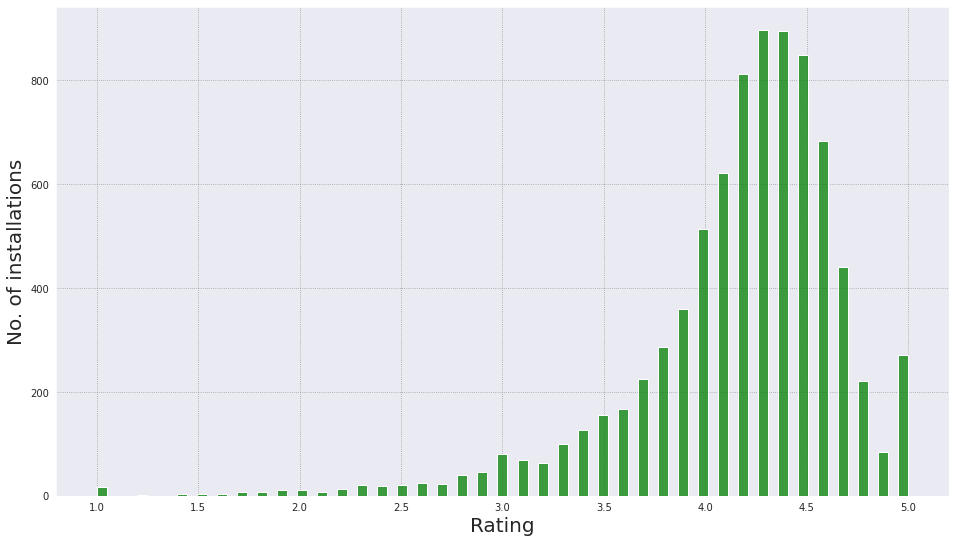

In [ ]:
plt.figure(figsize = (16,9))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.histplot(x = 'Rating', data = df_PlayStore_Updated, color='green')
plt.xlabel("Rating",fontsize  =20)
plt.ylabel("No. of installations",fontsize  =20);

## INFERENCE:
* From the data Analysis, it can be inferred that the maximum no. of downloads 
is between 4.0 to 4.6.

In [ ]:
df_PlayStore_Updated['Price'].unique()

array(['0', '$3.99', '$5.99', '$3.95', '$2.99', '$6.99', '$12.99',
       '$24.99', '$0.99', '$1.99', '$4.99', '$5.49', '$1.49', '$29.99',
       '$4.59', '$19.99', '$8.99', '$2.49', '$3.49', '$10.00', '$9.99',
       '$15.46', '$4.49', '$3.04', '$46.99', '$2.00', '$154.99',
       '$109.99', '$14.99', '$7.99', '$4.85', '$14.00', '$1.96', '$19.40',
       '$3.90', '$17.99', '$3.08', '$4.80', '$2.59', '$89.99', '$200.00',
       '$30.99', '$3.61', '$399.99', '$394.99', '$1.26', '$2.56', '$6.49',
       '$1.04', '$16.99', '$1.20', '$1.00', '$3.28', '$2.60', '$4.60',
       '$4.29', '$13.99', '$8.49', '$2.95', '$2.90', '$1.97', '$28.99',
       '$10.99', '$39.99', '$74.99', '$11.99', '$79.99', '$15.99',
       '$33.99', '$1.50', '$7.49', '$9.00', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$1.29', '$5.00', '$1.75', '$19.90',
       '$1.70', '$25.99', '$3.88', '$1.61', '$2.50', '$1.59', '$400.00',
       '$1.76', '$4.77', '$4.84', '$3.02'], dtype=object)

In [ ]:
str_ = df_PlayStore_Updated['Price'].unique()[0]

In [ ]:
if str_ == '0':
  print(int(str_))

0


In [ ]:
def price_formating(x):
  """
  take a price in dollar then return price wothout dollar sign in float format only
  """
  if x == '0':
    return int(x)
  x = x[1:]
  return float(x)  

In [ ]:
df_PlayStore_Updated['Price_Without_Dollar'] = df_PlayStore_Updated['Price'].apply(price_formating)

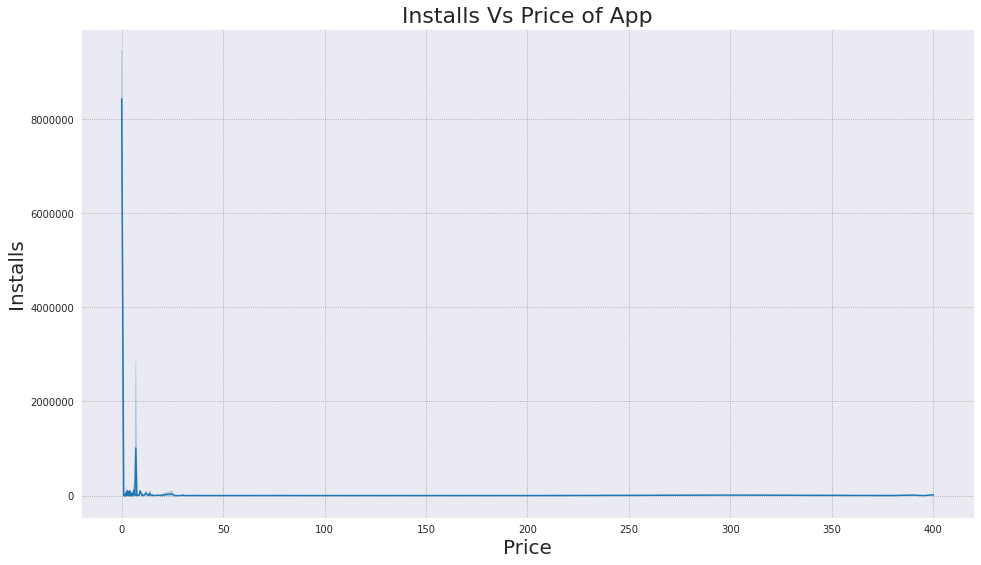

In [ ]:
plt.figure(figsize = (16,9))
ax = sns.lineplot(x = 'Price_Without_Dollar', y= 'Installs', data = df_PlayStore_Updated)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.title("Installs Vs Price of App", fontsize = 22)
plt.xlabel("Price",fontsize  =20)
plt.ylabel("Installs",fontsize  =20);

## INFERENCE:
1. If the app is free, then there is high probability of its installation
2. Paid apps are less likely to be installed.
3. For the paid apps category maximum Installations are upto 20 dollars.

In [ ]:
df_PlayStore_Updated['Last Updated'].dtype

dtype('<M8[ns]')

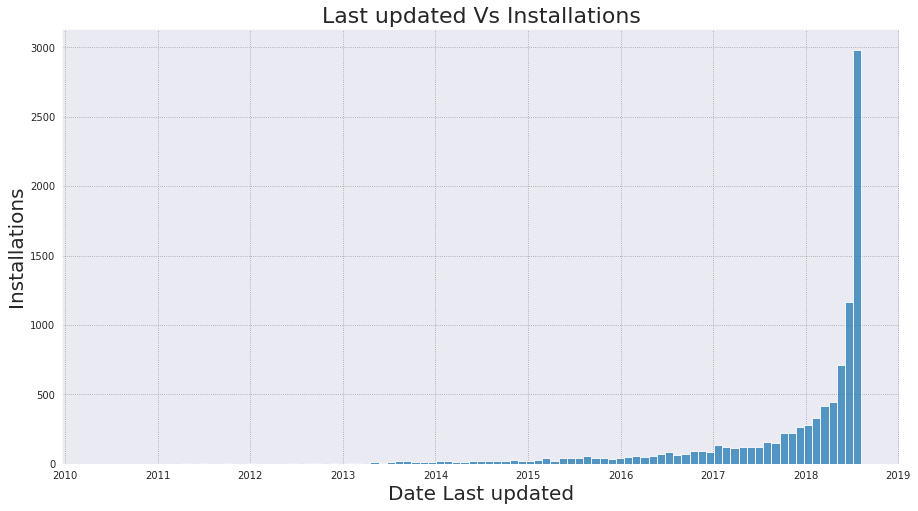

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8 # by adding this we do not need to write size again and again
sns.histplot(x = 'Last Updated', data = df_PlayStore_Updated)
plt.title("Last updated Vs Installations", fontsize = 22)
plt.xlabel("Date Last updated",fontsize  =20)
plt.ylabel("Installations",fontsize  =20);

## INFERENCE:
1. If Developers are updating their apps regularly then there are high installations
2. As we can infer from Histplot, developer should give updates within 1 to 2 years of app launch.

# <u>3. Exploring the top 5 highest rated free and paid apps.</u>

In [ ]:
df_PlayStore_Updated['Rating'].isnull().sum()

1463

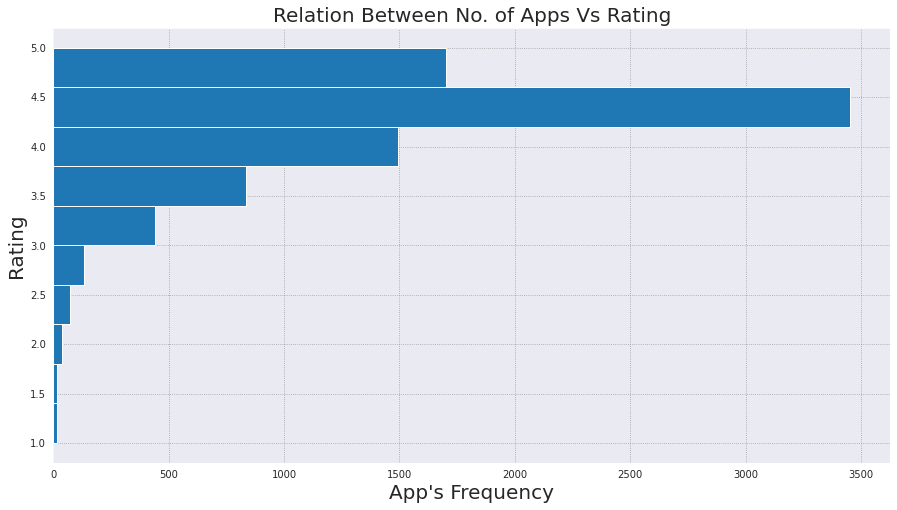

In [ ]:
ax = df_PlayStore_Updated['Rating'].plot(kind = 'hist', orientation="horizontal");
ax.set_xlabel("App's Frequency", fontsize = 20)
ax.set_ylabel("Rating", fontsize = 20)
ax.set_title("Relation Between No. of Apps Vs Rating", fontsize = 20);
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [ ]:
df_PlayStore_Updated['Type']

0       Free
1       Free
2       Free
3       Free
4       Free
        ... 
9656    Paid
9657    Free
9658    Free
9659    Paid
9660    Free
Name: Type, Length: 9661, dtype: object

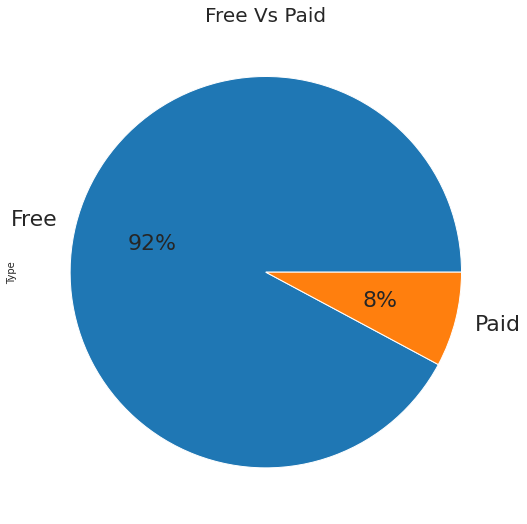

In [ ]:
df_PlayStore_Updated['Type'].value_counts().plot.pie(figsize = (20,9),
            fontsize=22, autopct='%1.0f%%',)
plt.title("Free Vs Paid",fontsize  =20);



In [ ]:
# Top -5 Highest Rated free Apps\

max_rating = df_PlayStore_Updated['Rating'].max()
# print(max_rating)
df_PlayStore_Updated[(df_PlayStore_Updated['Type'] == 'Free') & (df_PlayStore_Updated['Rating'] == max_rating )].head().sort_values(by = 'Rating', ascending=False)[['App','Category'	,'Rating','Type']].reset_index(drop=True)


,App,Category,Rating,Type
0,DF Glue Board,PARENTING,5.0,Free
1,CN Resident,FAMILY,5.0,Free
2,CL Strength,HEALTH_AND_FITNESS,5.0,Free
3,Color CL,LIFESTYLE,5.0,Free
4,CP Trivia,GAME,5.0,Free


##<u> Top 5 Highest Rated Free Apps</u>

1. DF Glue Board
2. CN Resident	
3. CL Strength
4. Color CL	
5. CP Trivia


In [ ]:
# Top -5 Highest Rated Paid Apps
max_rating = df_PlayStore_Updated['Rating'].max()
# print(max_rating)
df_PlayStore_Updated[(df_PlayStore_Updated['Type'] == 'Paid') & (df_PlayStore_Updated['Rating'] == max_rating )].head().sort_values(by = 'Rating', ascending=False)[['App','Category'	,'Rating','Type']].reset_index(drop=True)


,App,Category,Rating,Type
0,USMLE Step 2 CK Flashcards,FAMILY,5.0,Paid
1,211:CK,GAME,5.0,Paid
2,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,Paid
3,Morse Player,FAMILY,5.0,Paid
4,AC DC Power Monitor,LIFESTYLE,5.0,Paid


## <u>Top 5 Highest Rated Paid Apps</u>

1. USMLE Step 2 CK Flashcards
2. 211:CK
3. 30WPM Amateur ham radio Koch CW Morse code tra...	
4. Morse Player
5. AC DC Power Monitor	

##<u> 4. Exploring the average rating for each category.</u>

In [ ]:
avg_rating = df_PlayStore_Updated['Rating'].mean() 

In [ ]:
df_PlayStore_Updated['Category'].head(10)

0    GAME
1    GAME
2    GAME
3    GAME
4    GAME
5    GAME
6    GAME
7    GAME
8    GAME
9    GAME
Name: Category, dtype: object

In [ ]:
df_cat_rat = df_PlayStore_Updated.groupby('Category').agg({'Rating':'mean'}).reset_index().sort_values(by = 'Rating', ascending = False)

In [ ]:
df_cat_rat.reset_index(drop=True)

,Category,Rating
0,EVENTS,4.435556
1,EDUCATION,4.364407
2,ART_AND_DESIGN,4.357377
3,BOOKS_AND_REFERENCE,4.344970
4,PERSONALIZATION,4.332215
5,PARENTING,4.300000
6,BEAUTY,4.278571
7,SOCIAL,4.247291
8,GAME,4.246820
9,WEATHER,4.243056


In [ ]:
df_top_10 = df_cat_rat.head(10)

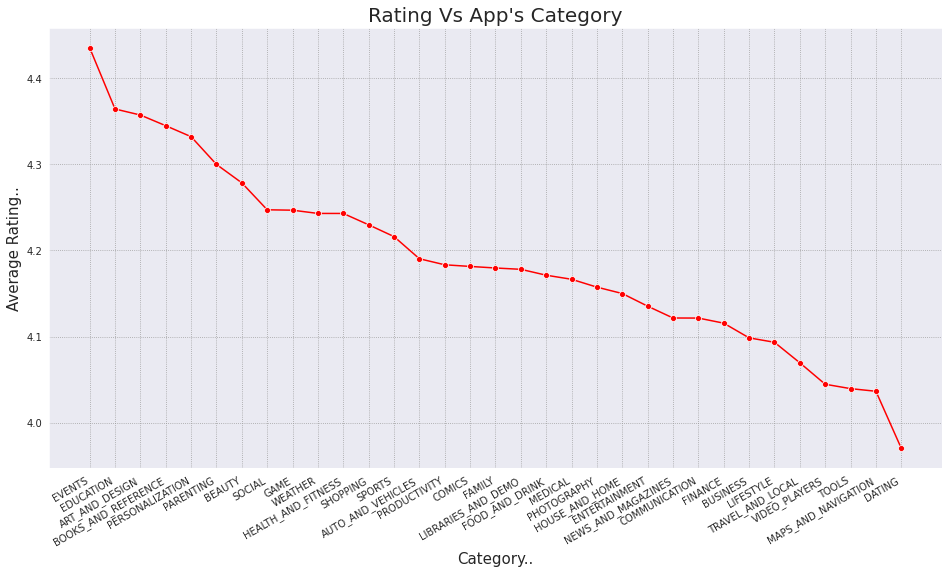

In [ ]:
fig = plt.figure(figsize = (16,9))
sns.lineplot(x = 'Category', y = 'Rating',data = df_cat_rat, color="red", marker='o')
fig.autofmt_xdate()
plt.xlabel("Category..", fontsize = 15)
plt.ylabel("Average Rating..", fontsize = 15)
plt.title("Rating Vs App's Category", fontsize = 20);

## INFERENCE:
1. As we can see the Average Rating of each category and also it is inferred that the Maximum Average of Category is "EVENTS".
2. I applied the groupby method to find the Average Rating of each category.


# <u>5. Understanding the sentiment polarity of the users.</u>

In [ ]:
pd.set_option("display.max_rows",None)
df_UserReview.tail()
#After the index no. 64231 all the features values are NaN. So I am dropping those records after has equal or greater than index 64231

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
miss = df_UserReview.isnull().sum().sort_values(ascending = False)
per = df_UserReview.isnull().mean().sort_values(ascending = False)
pd.concat([miss,round(per*100,3)],keys = ['Missing_Values','Percentage'], axis = 1)

,Missing_Values,Percentage
Translated_Review,26868,41.789
Sentiment,26863,41.781
Sentiment_Polarity,26863,41.781
Sentiment_Subjectivity,26863,41.781
App,0,0.000


In [ ]:
row_to_remove = list(df_UserReview[64231:]['App'].reset_index()['index'])

In [ ]:
df_UserReview_Updated = df_UserReview.drop(index = row_to_remove, axis = 0)

In [ ]:
df_UserReview_Updated.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.25
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.00
64228,Housing-Real Estate & Property,NaN,NaN,NaN,NaN
64229,Housing-Real Estate & Property,NaN,NaN,NaN,NaN
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.40


In [ ]:
miss = df_UserReview_Updated.isnull().sum().sort_values(ascending = False)
per = df_UserReview_Updated.isnull().mean().sort_values(ascending = False)
pd.concat([miss,round(per*100,3)],keys = ['Missing_Values','Percentage'], axis = 1)

,Missing_Values,Percentage
Translated_Review,26804,41.731
Sentiment,26799,41.723
Sentiment_Polarity,26799,41.723
Sentiment_Subjectivity,26799,41.723
App,0,0.000


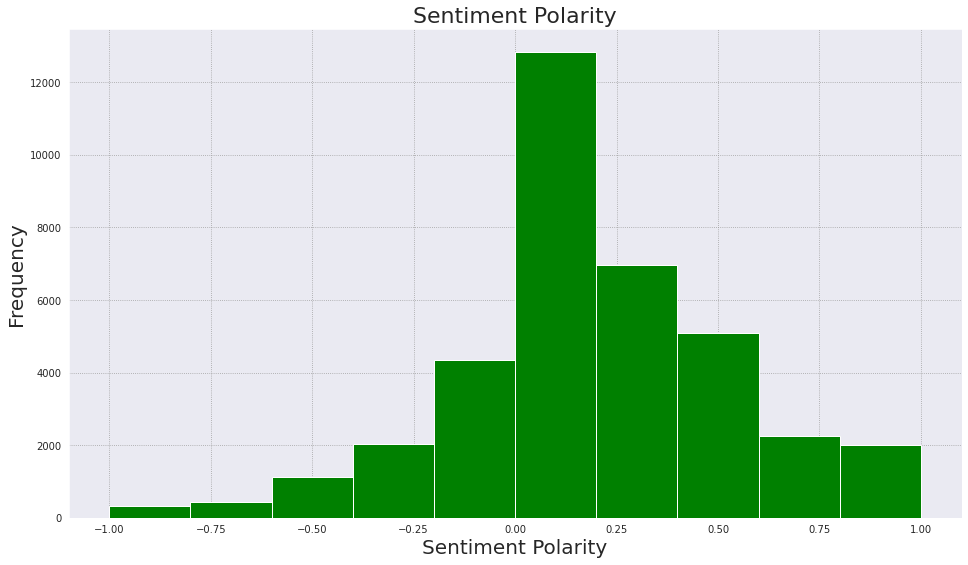

In [ ]:
ax = df_UserReview_Updated['Sentiment_Polarity'].plot(kind = 'hist',figsize = (16,9), color = 'green');
ax.set_xlabel("Sentiment Polarity", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)
ax.set_title("Sentiment Polarity", fontsize = 22);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


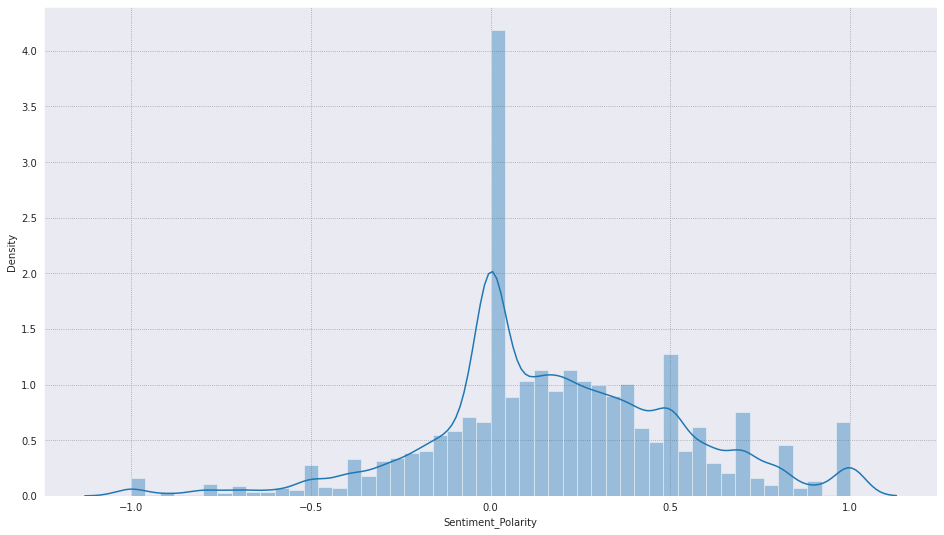

In [ ]:
plt.figure(figsize= (16,9))
sns.distplot(a = df_UserReview['Sentiment_Polarity'],norm_hist = True);

In [ ]:
df_UserReview_Updated.shape

(64231, 5)

In [ ]:
# just Sentiment_Polarity fill by mean
df_UserReview_Updated['Sentiment_Polarity'] = df_UserReview_Updated['Sentiment_Polarity'].fillna(df_UserReview_Updated['Sentiment_Polarity'].mean())

## INFERENCE:
1. Maximum Apps have around  40000 apps reviews Sentiment polarity lies between 0.0 to .18 (Neutral to towards Positive)
2. Around 3000 apps reviews Sentiment Ploarity lies between -1 to 0.0 means About 3000 apps have negative sentiment polarity.
3. Mostly Apps Sentiment polarity lies between -0.47 to +.8